### Project Title - Medical Insurance Cost Prediction

* by Shrikant Suryawanshi

### Project Discription -

* This is a machine learning project which aims to predict a medical insurance cost. This project has appliactions in health care sector as well as in acturial sciences.

### Problem Statement - 
* We have medical insurance cost dataset with few variables like age, sex, bmi, number of children, smoker, and cost. Based on this information we have to estimate the medical insurance cost for a new customer.

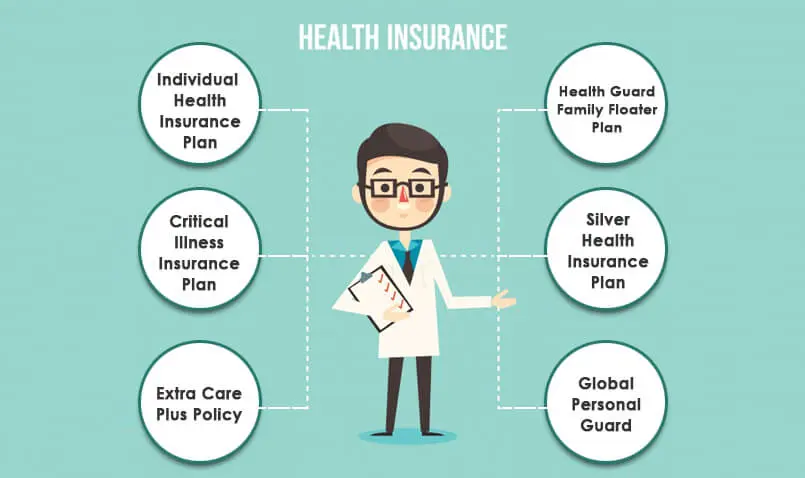

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Pre-processing and EDA

In [2]:
# import the data
data = pd.read_csv(r"E:\SHRIKANT\1 Symbiosis Statistical Institute\Summer Projects\5. Medical Cost Insurance Prediction using Python\insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Categorical Features -
* sex
* smoker
* region

In [4]:
# shape of the dataset
data.shape

(1338, 7)

* rows = 1338
* columns = 7

In [5]:
# checking for null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No null values!

In [6]:
# basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# description of the dataset (it takes only numerical columns)
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* This discription gives a lot of important information about the dataset

##### column wise study

#### 1.Age

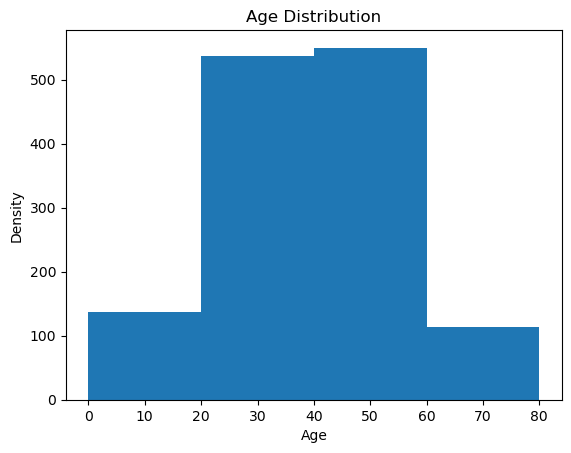

In [8]:
# Age Distribution in the dataset
plt.hist(data['age'], bins=[0,20,40,60,80])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

* We have more population between age 20 to 60
* The age is normally distributed

#### 2. Sex

In [9]:
# frequency of males and females
sex_counts = data['sex'].value_counts()
sex_counts

male      676
female    662
Name: sex, dtype: int64

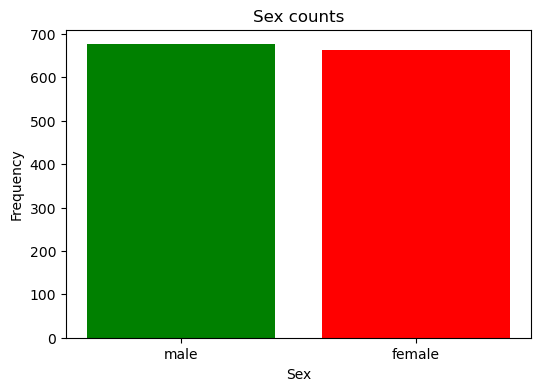

In [10]:
# barplot
plt.figure(figsize=(6,4))
plt.bar(sex_counts.index, sex_counts.values, color = ['green','red'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex counts')
plt.show()

#### 3. BMI

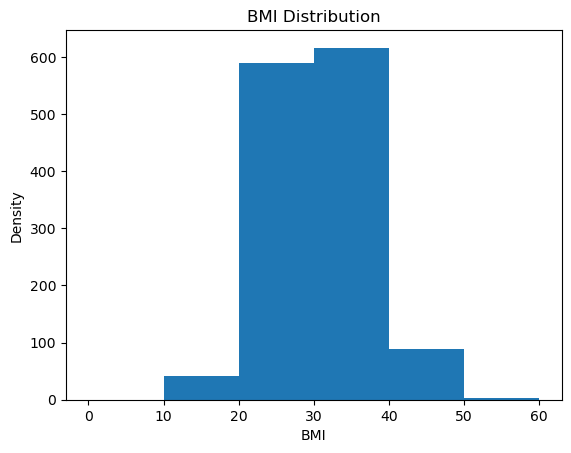

In [11]:
# bmi Distribution in the dataset
plt.hist(data['bmi'], bins=[0,10,20,30,40,50,60])
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution')
plt.show()

* Most people have BMI between 20 to 40
* Normal BMI range - 18.5 to 24.9
* BMI distribution follows a normal distribution

#### 4. Children

In [12]:
# children counts
children_counts = data['children'].value_counts()
children_counts

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

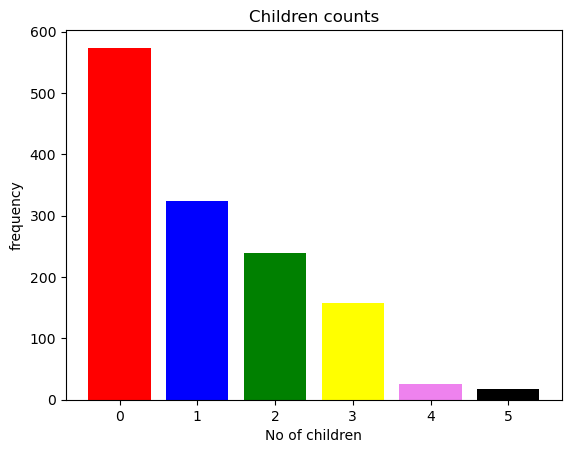

In [13]:
# bar plot
plt.bar(children_counts.index,children_counts.values, color=['red','blue','green','yellow','violet','black'])
plt.xlabel('No of children')
plt.ylabel('frequency')
plt.title('Children counts')
plt.show()

* Many people have no children
* Followed by people having 1,2,3,4, and 5 children

#### 5. Smoker

In [14]:
# smokers' counts
smoker_count = data['smoker'].value_counts()
smoker_count

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
# smoker percentage
smoker_percentage = (smoker_count.yes/(smoker_count.yes+smoker_count.no))*100
print('smoker_percentage =',round(smoker_percentage,2),'%')

smoker_percentage = 20.48 %


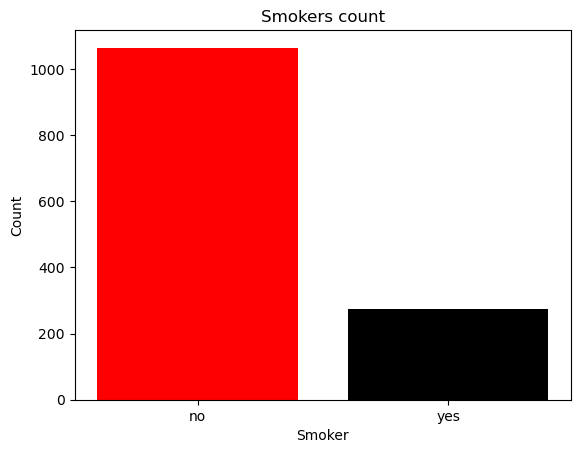

In [16]:
# barplot
plt.bar(smoker_count.index, smoker_count.values, color=['red','black'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smokers count')
plt.show()

* Most of the people are non-smokers
* 20.48% people are smokers

#### 6. Region

In [17]:
# region count
region_count = data['region'].value_counts()
region_count

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

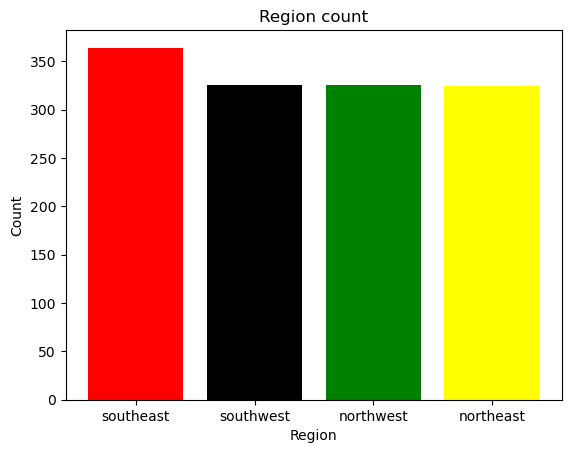

In [18]:
#barplot
plt.bar(region_count.index, region_count.values, color = ['red','black','green','yellow'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region count')
plt.show()

* Approximately, people are equally spread region wise

#### 7. Charges

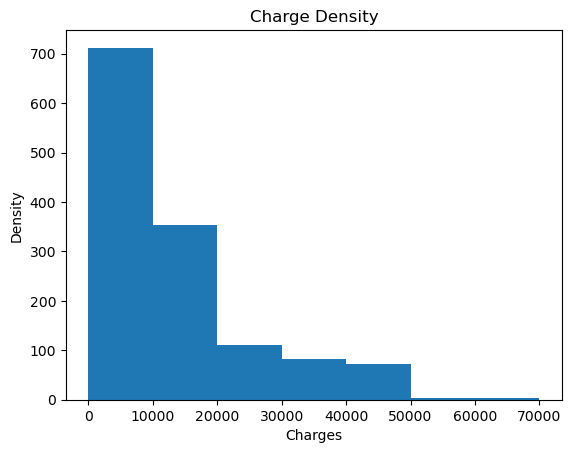

In [19]:
# charge distribution
plt.hist(data['charges'], bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Charge Density')
plt.show()

* It is positively skewed
* 0 to 20000 is most frequently charged amount

### Data Analysis

##### Note

* We have 3 categorical columns which are in text form
* We cannot feed the textual data to the ML model directly
* So we need to convert those categories in the numbers

#### Encoding the Categorical Features

In [20]:
# sex column
data.replace({'sex':{'male':0, 'female':1}}, inplace = True)

# smoker column
data.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)

# region column
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [21]:
data # This is processed data and ready to analysis

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


#### Seperating the Data

* Variable under study - charges (i.e. dependent variable)
* Features / Predictors - age, sex, bmi, children, smoker, region (i.e. independent variable)

In [22]:
x = data.drop(columns='charges',axis=1) # independent variables or features
y = data['charges'] # dependent variable

In [23]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Splitting the data into training and testing dataset

* We develop our model on training dataset and find its accuracy with testing dataset before finalizing the model
* This is essential part of model evolution

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
x_train, y_train

(      age  sex     bmi  children  smoker  region
 882    21    1  22.135         0       1       2
 505    37    0  30.875         3       1       3
 798    58    1  33.100         0       1       1
 792    22    1  23.180         0       1       2
 201    48    1  32.230         1       1       0
 ...   ...  ...     ...       ...     ...     ...
 466    60    1  28.700         1       1       1
 299    48    1  28.880         1       1       3
 493    61    0  43.400         0       1       1
 527    51    1  25.800         1       1       1
 1192   58    1  32.395         1       1       2
 
 [1070 rows x 6 columns],
 882      2585.85065
 505      6796.86325
 798     11848.14100
 792      2731.91220
 201      8871.15170
            ...     
 466     13224.69300
 299      9249.49520
 493     12574.04900
 527      9861.02500
 1192    13019.16105
 Name: charges, Length: 1070, dtype: float64)

In [27]:
x_test, y_test

(      age  sex     bmi  children  smoker  region
 17     23    0  23.845         0       1       2
 1091   55    1  29.830         0       1       2
 273    50    0  27.455         1       1       2
 270    18    0  29.370         1       1       0
 874    44    0  21.850         3       1       2
 ...   ...  ...     ...       ...     ...     ...
 232    19    1  17.800         0       1       1
 323    57    0  40.945         0       1       2
 1337   61    1  29.070         0       0       3
 1066   48    0  37.290         2       1       0
 966    51    0  24.795         2       0       3
 
 [268 rows x 6 columns],
 17       2395.17155
 1091    11286.53870
 273      9617.66245
 270      1719.43630
 874      8891.13950
            ...     
 232      1727.78500
 323     11566.30055
 1337    29141.36030
 1066     8978.18510
 966     23967.38305
 Name: charges, Length: 268, dtype: float64)

### Model Training

* Most imp part of the project!!

#### Linear Regression
* Here we have more than 1 predictors i.e. independent variables, hance we have to use multiple linear regression

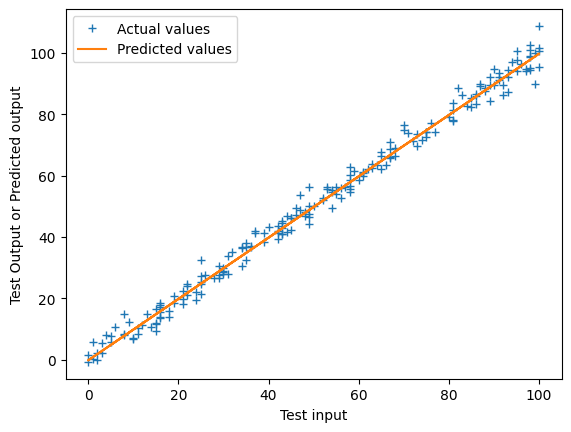

In [28]:
# let's fit the model
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# make predictions based on training dataset
y_predict = model.predict(x_train)

In [31]:
y_predict.shape

(1070,)

#### Model Evolution

In [32]:
# check r square value
r2_value = metrics.r2_score(y_train, y_predict)
print('r square value is',r2_value)

r square value is 0.751505643411174


In [33]:
# make predictions based on testing dataset
y_predict_2 = model.predict(x_test)

In [34]:
# evoluate the model
# check r square value
r2_value_2 = metrics.r2_score(y_test, y_predict_2)
print('r square value is',r2_value_2)

r square value is 0.7447273869684077


#### Note -

* We evoluated the model on both training and testing datasets
* This is done to avoid overfitting or underfitting of the data
* Sometimes model fits good over training dataset but fails to perform on testing dataset or vice-versa
* Therefore the r_square value should be same (approximately) in both cases

### Next Steps

* Now we should try to increase the r_suqare value such that predictions will become more accurate

* This can be done by feature selection technique

### Feature Selection

* We should remove unwanted columns from features so that the predictions will be more accurate!

* Features - age, sex, bmi, smoker, children, region
* Here we know that age, sex, bmi, smoker have an effect medical insurance cost
* but no of chlidren and region in which people are living is doesn't matter a lot
* Hence we can drop them and again develop the model and check the accuracy

### Redeveloping the model

In [35]:
# we have 
x_train, x_train

(      age  sex     bmi  children  smoker  region
 882    21    1  22.135         0       1       2
 505    37    0  30.875         3       1       3
 798    58    1  33.100         0       1       1
 792    22    1  23.180         0       1       2
 201    48    1  32.230         1       1       0
 ...   ...  ...     ...       ...     ...     ...
 466    60    1  28.700         1       1       1
 299    48    1  28.880         1       1       3
 493    61    0  43.400         0       1       1
 527    51    1  25.800         1       1       1
 1192   58    1  32.395         1       1       2
 
 [1070 rows x 6 columns],
       age  sex     bmi  children  smoker  region
 882    21    1  22.135         0       1       2
 505    37    0  30.875         3       1       3
 798    58    1  33.100         0       1       1
 792    22    1  23.180         0       1       2
 201    48    1  32.230         1       1       0
 ...   ...  ...     ...       ...     ...     ...
 466    60    1  28.70

* Note - variable y will not change becuase it is a variable under study 

* drop children and region column

In [36]:
x_train_01 = x_train.drop(columns = ['children','region'],axis=1)

In [37]:
x_test_01 = x_test.drop(columns = ['children','region'],axis=1)

In [38]:
x_train_01, x_test_01

(      age  sex     bmi  smoker
 882    21    1  22.135       1
 505    37    0  30.875       1
 798    58    1  33.100       1
 792    22    1  23.180       1
 201    48    1  32.230       1
 ...   ...  ...     ...     ...
 466    60    1  28.700       1
 299    48    1  28.880       1
 493    61    0  43.400       1
 527    51    1  25.800       1
 1192   58    1  32.395       1
 
 [1070 rows x 4 columns],
       age  sex     bmi  smoker
 17     23    0  23.845       1
 1091   55    1  29.830       1
 273    50    0  27.455       1
 270    18    0  29.370       1
 874    44    0  21.850       1
 ...   ...  ...     ...     ...
 232    19    1  17.800       1
 323    57    0  40.945       1
 1337   61    1  29.070       0
 1066   48    0  37.290       1
 966    51    0  24.795       0
 
 [268 rows x 4 columns])

In [39]:
# bringing the model
model_01 = LinearRegression()

In [40]:
# fitting model on training dataset
model_01.fit(x_train_01, y_train)

LinearRegression()

In [41]:
# predictions
y_train_predict = model_01.predict(x_train_01)

In [42]:
# r_square value
r2_training = metrics.r2_score(y_train, y_train_predict)
print('r_square value =', r2_training)

r_square value = 0.7477156186093263


In [43]:
# fitting model on testing dataset
model_01.fit(x_test_01, y_test)

LinearRegression()

In [44]:
# predictions
y_test_predict = model_01.predict(x_test_01)

In [45]:
# r_square value
r2_testing = metrics.r2_score(y_test, y_test_predict)
print('r_square value =', r2_testing)

r_square value = 0.7477481058853421


### Conclusion -

* No significant difference is observed after feature selection method
* So we will keep our first model to build a medical cost insurance system

### Building a Medical Cost Insurance System

In [49]:
input_data = (31,1,25.74,0,1,0)

# this is a tuple, we need to convert into numpy array to feed the model
array_input = np.asarray(input_data)

# now we need to reshape the array to get the predictions
reshaped_array = array_input.reshape(1,-1)

# get the predictions
prediction = model.predict(reshaped_array)
print('The medical insurance cost will be', prediction)

The medical insurance cost will be [3760.0805765]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


* The original value for the given input was 3760.6216
* So we got a close prediction
* Hence our model has a good accuracy